In [3]:
import csv 
row = []
with open("customer(A).csv") as csv_file:
    csvread = csv.reader(csv_file, delimiter = ',')
    print(csvread)
    for row in csvread:
        print(row)

['age', 'income', 'student', 'creditrating', 'class']
['youth', 'high', 'no', 'fair', 'no']
['youth', 'high', 'no', 'excellent', 'no']
['middleaged', 'high', 'no', 'fair', 'yes']
['senior', 'medium', 'no', 'fair', 'yes']
['senior', 'low', 'yes', 'fair', 'yes']
['senior', 'low', 'yes', 'excellent', 'no']
['middleaged', 'low', 'yes', 'excellent', 'yes']
['youth', 'medium', 'no', 'fair', 'no']
['youth', 'low', 'yes', 'fair', 'yes']
['senior', 'medium', 'yes', 'fair', 'yes']
['youth', 'medium', 'yes', 'excellent', 'yes']
['middleaged', 'medium', 'no', 'excellent', 'yes']
['middleaged', 'low', 'yes', 'fair', 'yes']
['senior', 'medium', 'no', 'excellent', 'no']
['senior', 'medium', 'no', 'excellent', 'no']
['senior', 'medium', 'no', 'excellent', 'no']


In [4]:
import pandas as pd
csv = pd.read_csv("customer(A).csv")
print(csv)

           age  income student creditrating class
0        youth    high      no         fair    no
1        youth    high      no    excellent    no
2   middleaged    high      no         fair   yes
3       senior  medium      no         fair   yes
4       senior     low     yes         fair   yes
5       senior     low     yes    excellent    no
6   middleaged     low     yes    excellent   yes
7        youth  medium      no         fair    no
8        youth     low     yes         fair   yes
9       senior  medium     yes         fair   yes
10       youth  medium     yes    excellent   yes
11  middleaged  medium      no    excellent   yes
12  middleaged     low     yes         fair   yes
13      senior  medium      no    excellent    no
14      senior  medium      no    excellent    no
15      senior  medium      no    excellent    no


In [5]:
csv.dtypes

age             object
income          object
student         object
creditrating    object
class           object
dtype: object

In [6]:
csv['income'].value_counts()


income
medium    8
low       5
high      3
Name: count, dtype: int64

<Axes: xlabel='income'>

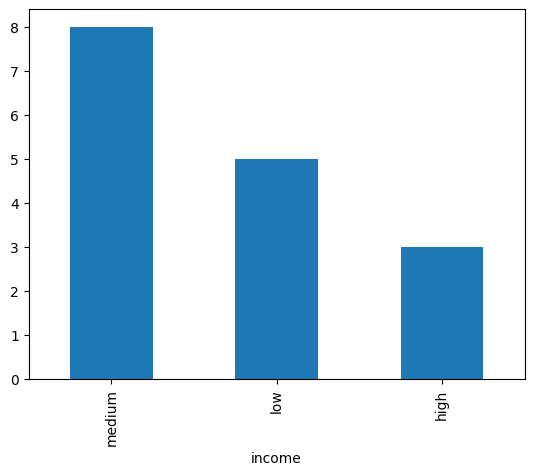

In [68]:
import matplotlib.pyplot as plt
income = csv['income'].value_counts()
income.plot.bar()


In [35]:
print(csv[csv.duplicated(subset=['age', 'income', 'student', 'creditrating', 'class'])])
print(csv.drop_duplicates())


       age  income student creditrating class
14  senior  medium      no    excellent    no
15  senior  medium      no    excellent    no
           age  income student creditrating class
0        youth    high      no         fair    no
1        youth    high      no    excellent    no
2   middleaged    high      no         fair   yes
3       senior  medium      no         fair   yes
4       senior     low     yes         fair   yes
5       senior     low     yes    excellent    no
6   middleaged     low     yes    excellent   yes
7        youth  medium      no         fair    no
8        youth     low     yes         fair   yes
9       senior  medium     yes         fair   yes
10       youth  medium     yes    excellent   yes
11  middleaged  medium      no    excellent   yes
12  middleaged     low     yes         fair   yes
13      senior  medium      no    excellent    no


In [77]:
for key, value in csv.items():
    if len(csv[key].unique()) == 1:
        print(key)
        print("Hello")
        del csv[key]
print()

In [45]:
transform = pd.get_dummies(csv['income'])
df_new = pd.concat([csv, transform], axis =1)
print(df_new)

           age  income student creditrating class   high    low  medium
0        youth    high      no         fair    no   True  False   False
1        youth    high      no    excellent    no   True  False   False
2   middleaged    high      no         fair   yes   True  False   False
3       senior  medium      no         fair   yes  False  False    True
4       senior     low     yes         fair   yes  False   True   False
5       senior     low     yes    excellent    no  False   True   False
6   middleaged     low     yes    excellent   yes  False   True   False
7        youth  medium      no         fair    no  False  False    True
8        youth     low     yes         fair   yes  False   True   False
9       senior  medium     yes         fair   yes  False  False    True
10       youth  medium     yes    excellent   yes  False  False    True
11  middleaged  medium      no    excellent   yes  False  False    True
12  middleaged     low     yes         fair   yes  False   True 

In [49]:
df_new['age'] = [0 if x=='youth' else 1 for x in df_new['age']]
print(df_new)

    age  income student creditrating class   high    low  medium
0     1    high      no         fair    no   True  False   False
1     1    high      no    excellent    no   True  False   False
2     1    high      no         fair   yes   True  False   False
3     1  medium      no         fair   yes  False  False    True
4     1     low     yes         fair   yes  False   True   False
5     1     low     yes    excellent    no  False   True   False
6     1     low     yes    excellent   yes  False   True   False
7     1  medium      no         fair    no  False  False    True
8     1     low     yes         fair   yes  False   True   False
9     1  medium     yes         fair   yes  False  False    True
10    1  medium     yes    excellent   yes  False  False    True
11    1  medium      no    excellent   yes  False  False    True
12    1     low     yes         fair   yes  False   True   False
13    1  medium      no    excellent    no  False  False    True
14    1  medium      no  

In [51]:
df_new.head(3)
df_new.tail(3)

,age,income,student,creditrating,class,high,low,medium
13,1,medium,no,excellent,no,False,False,True
14,1,medium,no,excellent,no,False,False,True
15,1,medium,no,excellent,no,False,False,True


In [59]:
df_new.loc[0, :]

age                 1
income           high
student            no
creditrating     fair
class              no
high             True
low             False
medium          False
Name: 0, dtype: object

In [62]:
new_row = {'age':'senior','income':'high','student': 'No','creditrating':'low','class':'NO'}
df_new.loc[len(df_new)] = new_row
print(df_new)

       age  income student creditrating class high  low medium
0        1    high      no         fair    no  1.0  0.0    0.0
1        1    high      no    excellent    no  1.0  0.0    0.0
2        1    high      no         fair   yes  1.0  0.0    0.0
3        1  medium      no         fair   yes  0.0  0.0    1.0
4        1     low     yes         fair   yes  0.0  1.0    0.0
5        1     low     yes    excellent    no  0.0  1.0    0.0
6        1     low     yes    excellent   yes  0.0  1.0    0.0
7        1  medium      no         fair    no  0.0  0.0    1.0
8        1     low     yes         fair   yes  0.0  1.0    0.0
9        1  medium     yes         fair   yes  0.0  0.0    1.0
10       1  medium     yes    excellent   yes  0.0  0.0    1.0
11       1  medium      no    excellent   yes  0.0  0.0    1.0
12       1     low     yes         fair   yes  0.0  1.0    0.0
13       1  medium      no    excellent    no  0.0  0.0    1.0
14       1  medium      no    excellent    no  0.0  0.0

In [66]:
import numpy as np
new_df = pd.DataFrame({'age_int':np.random.randint(0,100,20)})
labels = ["{0}-{1}".format(i, i+9)for i in range(0,100,10)]
new_df['age_group']=pd.cut(new_df.age_int, range(0,105, 10), right=False, labels=labels)
new_df.head(15)
df_new = pd.concat([df_new, new_df], axis=1)
print(df_new)

       age  income student creditrating class high  low medium  age_int   
0        1    high      no         fair    no  1.0  0.0    0.0       67  \
1        1    high      no    excellent    no  1.0  0.0    0.0       65   
2        1    high      no         fair   yes  1.0  0.0    0.0       44   
3        1  medium      no         fair   yes  0.0  0.0    1.0       73   
4        1     low     yes         fair   yes  0.0  1.0    0.0       33   
5        1     low     yes    excellent    no  0.0  1.0    0.0       81   
6        1     low     yes    excellent   yes  0.0  1.0    0.0       52   
7        1  medium      no         fair    no  0.0  0.0    1.0       40   
8        1     low     yes         fair   yes  0.0  1.0    0.0       70   
9        1  medium     yes         fair   yes  0.0  0.0    1.0       29   
10       1  medium     yes    excellent   yes  0.0  0.0    1.0       37   
11       1  medium      no    excellent   yes  0.0  0.0    1.0       76   
12       1     low     ye